# Working with population dynamics

This notebook uses some of the functions from `demographics.py` and allows you to step through the transition path for population dynamics.

In [20]:
%load_ext autoreload
%autoreload 2

# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import demographics as demog

# define parameters
E = 20 # age become economically active
S = 80 #economically active periods
min_yr = 1 # min age
max_yr = 100 # max age

# define functions
def omega_p1(omega, f_s, rho_s, rho_0, i_s, years_life):
    '''
    This function iterates the population distribtuion ahead one year.
    It is analogous to equation 10.1, though normalized for population 
    growth.
    '''
    omega_p1 = np.zeros(years_life)
    omega_p1[0] = ((1 - rho_0) * (omega*f_s).sum()) + i_s[0]*omega[0]
    omega_p1[1:] = (1-rho_s[:-1])*omega[:-1] + i_s[1:]*omega[1:]
    # take out pop growth
    g_np1 = (omega_p1.sum()/omega.sum())-1
    omega_p1 = omega_p1/(1+g_np1)
    return omega_p1
    
def get_initial_pop(E, S, min_year, max_year):
    ''' 
    This somputes the intial population distribution.  This is the 
    U.S. population in 2013.
    '''
    pop_file = "data/demographic/pop_data.csv"
    pop_data = pd.read_table(pop_file, sep=',', thousands=',')
    pop_data_samp = pop_data[(pop_data['Age']>=min_yr-1) &
                    (pop_data['Age']<=max_yr-1)]
    age_year_all = pop_data_samp['Age'] + 1
    pop_2013 = np.array(pop_data_samp['2013'], dtype='f')
    # Generate the current population distribution given that E+S might
    # be less than max_yr-min_yr+1
    age_per_EpS = np.arange(1, E+S+1)
    pop_2013_EpS = demog.pop_rebin(pop_2013, E+S)
    pop_2013_pct = pop_2013_EpS / pop_2013_EpS.sum()
    return pop_2013_pct

def iterate_pop(omega, f_s, rho_s, rho_0, i_s, years_life, num_years):
    '''
    This function iterates on the law of motion for the population for
    the specified number of years.
    '''
    for t in range(num_years):
        omega_tp1 = omega_p1(omega, f_s, rho_s, rho_0, i_s, years_life)
        omega = omega_tp1
    
    return omega_tp1

#get population dynamic parameters
f_s = demog.get_fert(E+S, min_yr, max_yr, False)
rho_s, rho_0 = demog.get_mort(E+S, min_yr, max_yr, False)
i_s = demog.get_imm_resid(E+S, min_yr, max_yr, False)

# get the original population distribution
omega_orig = get_initial_pop(E, S, min_yr, max_yr)  


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/jason.debacker/repos/OG-JRC/Day5_Demog/in_class_code/demographics.py:287: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  mort_rates_sub = np.zeros(num_sub_bins * max_yr, dtype=np.float64)
/Users/jason.debacker/repos/OG-JRC/Day5_Demog/in_class_code/demographics.py:290: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ((1 - np.float64(mort_rates_mxyr[i])) ** (1 / num_sub_bins)))


## Show the pameters that govern the population dynamics

Mortality:

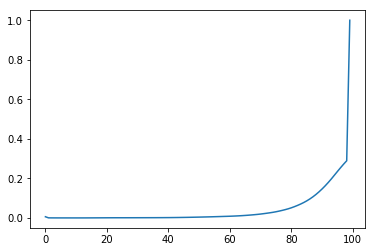

In [2]:
plt.plot(rho_s)
plt.show()

Fertility:

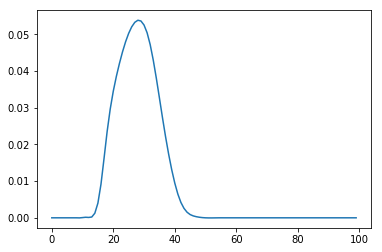

In [3]:
plt.plot(f_s)
plt.show()

Immigration:

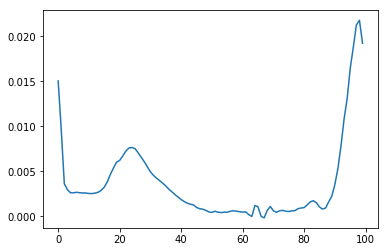

In [4]:
plt.plot(i_s)
plt.show()

Original (2013) distribution:

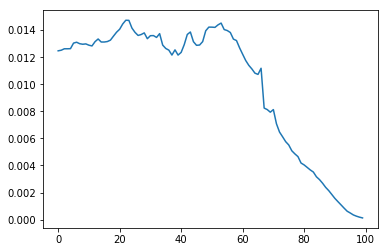

In [5]:
plt.plot(omega_orig)
plt.show()

Original population and that 10 years later:

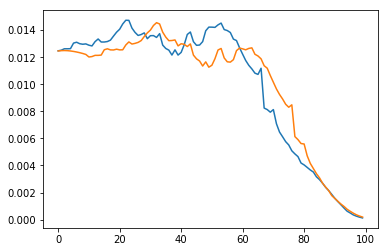

In [21]:
omega_10 = iterate_pop(omega_orig, f_s, rho_s, rho_0, i_s, E+S, 10)
plt.plot(omega_orig)
plt.plot(omega_10)
plt.show()

... and 100 years after intial year...

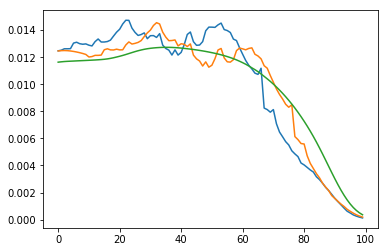

In [22]:
omega_100 = iterate_pop(omega_orig, f_s, rho_s, rho_0, i_s, E+S, 100)
plt.plot(omega_orig)
plt.plot(omega_10)
plt.plot(omega_100)
plt.show()

...1000 years...

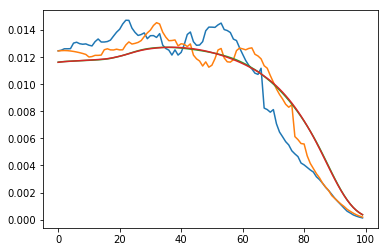

In [23]:
omega_1000 = iterate_pop(omega_orig, f_s, rho_s, rho_0, i_s, E+S, 1000)
plt.plot(omega_orig)
plt.plot(omega_10)
plt.plot(omega_100)
plt.plot(omega_1000)
plt.show()

... and 10,000 years later.

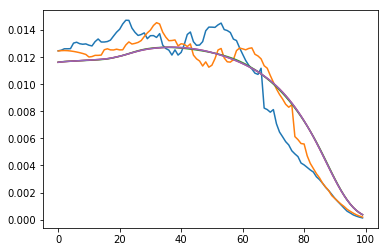

In [24]:
omega_10000 = iterate_pop(omega_orig, f_s, rho_s, rho_0, i_s, E+S, 10000)
plt.plot(omega_orig)
plt.plot(omega_10)
plt.plot(omega_100)
plt.plot(omega_1000)
plt.plot(omega_10000)
plt.show()